In [1]:
# Importing all the necessary libraries required

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder

In [2]:
# loding csv file into dataframe.

data = pd.read_csv("/Users/amit/Downloads/Language Detection.csv")
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [3]:
# Counting number of sentences in the given languages.
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [4]:
sr=pd.Series(data["Language"].value_counts())
lan=sr.to_numpy()
sr2=pd.Series(data["Language"].value_counts().index.tolist())
lan2=sr2.to_numpy()


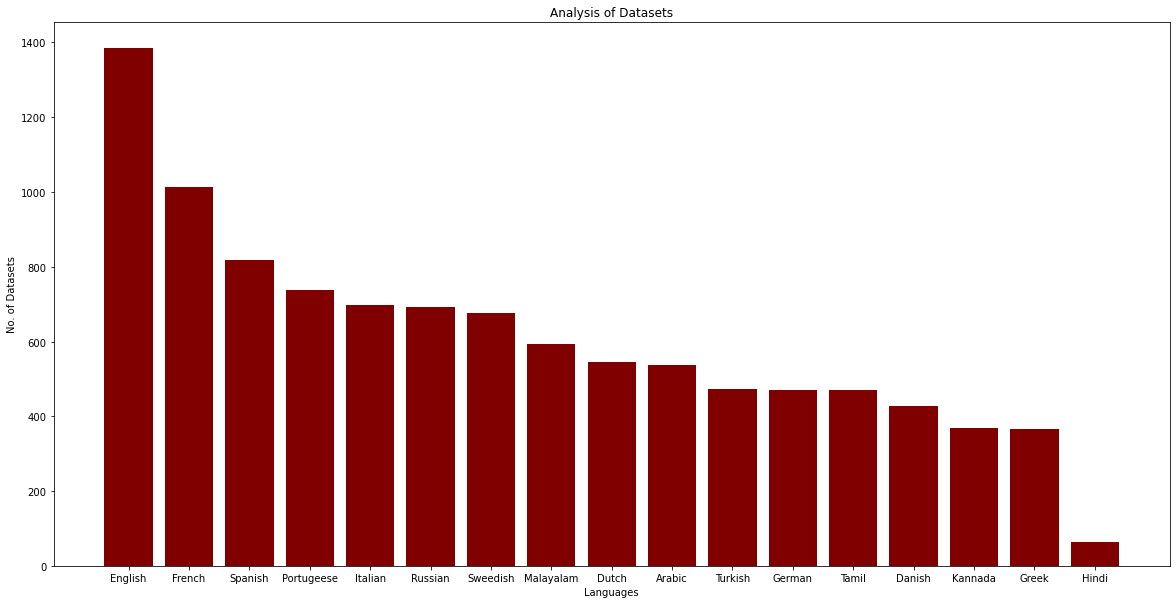

In [5]:
fig = plt.figure(figsize = (20, 10))
plt.bar(lan2, lan, color ='maroon',)
plt.xlabel("Languages")
plt.ylabel("No. of Datasets")
plt.title("Analysis of Datasets")
plt.show()

In [6]:
# Now saperating Independent and Dependent variable.

y=data['Language']
x=data['Text']


In [7]:
y

0        English
1        English
2        English
3        English
4        English
          ...   
10332    Kannada
10333    Kannada
10334    Kannada
10335    Kannada
10336    Kannada
Name: Language, Length: 10337, dtype: object

In [8]:
x

0         Nature, in the broadest sense, is the natural...
1        "Nature" can refer to the phenomena of the phy...
2        The study of nature is a large, if not the onl...
3        Although humans are part of nature, human acti...
4        [1] The word nature is borrowed from the Old F...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Name: Text, Length: 10337, dtype: object

In [9]:
# total no of languages in serires y .

y.count()

10337

In [10]:
# Extracting unique languages from y

z=pd.DataFrame(y.unique())

In [11]:
z

,0
0,English
1,Malayalam
2,Hindi
3,Tamil
4,Portugeese
5,French
6,Dutch
7,Spanish
8,Greek
9,Russian


In [12]:
lbe=LabelEncoder()
z=lbe.fit_transform(y)

In [13]:
z

array([3, 3, 3, ..., 9, 9, 9])

In [14]:
z.shape

(10337,)

In [15]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in x:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`"0-9]', '', text)
        re.sub(r'\[\[(?:[^\]|]*\|)?([^\]|]*)\]\]', '', text)
        text = re.sub(r'[[]]', '', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

<ipython-input-15-2b8444920ad2>:8: FutureWarning: Possible nested set at position 1
  text = re.sub(r'[[]]', '', text)


In [16]:
data_list

[' nature i the broadest sese is the atural physical material world or uiverse.',
 'nature ca refer to the pheomea of the physical world ad also to life i geeral.',
 'the study of ature is a large if ot the oly part of sciece.',
 'although humas are part of ature huma activity is ofte uderstood as a separate category from other atural pheomea.',
 ' the word ature is borrowed from the old frech ature ad is derived from the lati word atura or essetial qualities iate dispositio ad i aciet times literally meat birth.',
 ' i aciet philosophy atura is mostly used as the lati traslatio of the greek word physis φύσις which origially related to the itrisic characteristics that plats aimals ad other features of the world develop of their ow accord.',
 ' \nthe cocept of ature as a whole the physical uiverse is oe of several expasios of the origial otio it bega with certai core applicatios of the word φύσις by pre-socratic philosophers though this word had a dyamic dimesio the especially for herac

In [17]:
x
w=x

# Using bag of words and Navie Bayes algo

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
w = cv.fit_transform(data_list).toarray()

In [19]:
w

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
w.shape

(10337, 38665)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(w, z, test_size = 0.20)

In [22]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [23]:
y_pred = model.predict(x_test)

In [24]:
y_pred

array([ 1, 15, 12, ...,  3, 14, 12])

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [26]:
print(f"Accuracy is :{ac*100} %")

Accuracy is :97.72727272727273 %


In [27]:
setoflbs=set(z)
print(setoflbs)
newlbs=lbe.inverse_transform(list(setoflbs))
print(newlbs)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}
['Arabic' 'Danish' 'Dutch' 'English' 'French' 'German' 'Greek' 'Hindi'
 'Italian' 'Kannada' 'Malayalam' 'Portugeese' 'Russian' 'Spanish'
 'Sweedish' 'Tamil' 'Turkish']


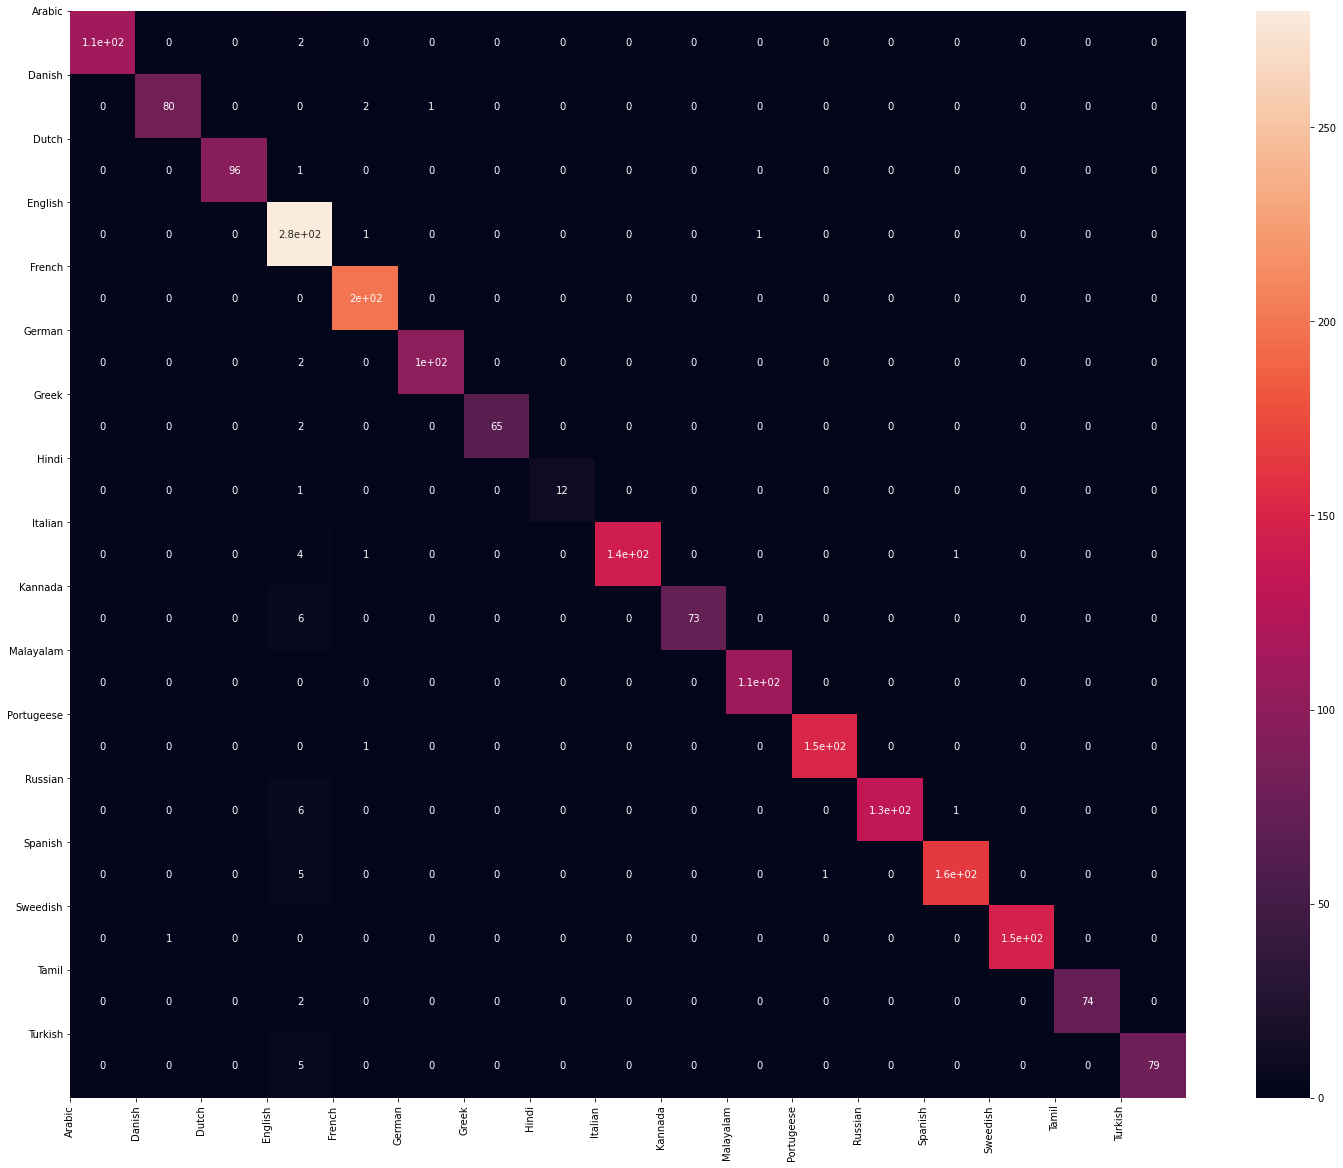

In [28]:
plt.figure(figsize=(25,20))
tick_marks = np.arange(len(newlbs))
sns.heatmap(cm, annot = True)
plt.xticks(tick_marks, newlbs,rotation=90)
plt.yticks(tick_marks, newlbs,rotation=0)
plt.show()

In [29]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = lbe.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

In [30]:
predict("provides a community based knowledge portal for Analytics and Data Science professionals")

The langauge is in English


In [31]:
predict("توفر  بوابة معرفية قائمة على المجتمع لمحترفي التحليلات وعلوم البيانات")


The langauge is in Arabic


In [32]:
predict("അനലിറ്റിക്സ്, ഡാറ്റാ സയൻസ് പ്രൊഫഷണലുകൾക്കായി കമ്മ്യൂണിറ്റി അധിഷ്ഠിത വിജ്ഞാന പോർട്ടൽ അനലിറ്റിക്സ് വിദ്യ നൽകുന്നു")

The langauge is in Malayalam


In [33]:
predict("Амит отличный парень")

The langauge is in Russian


In [34]:
predict("amit harika bir adam")

The langauge is in Turkish


In [35]:
predict("अमित बहुत अच्छा लड़का है")

The langauge is in Hindi


In [36]:
predict("is fear iontach é amit")

The langauge is in English


# Using Bag of words and Logistic regression

In [37]:
from sklearn.linear_model import LogisticRegression
model3=LogisticRegression()
model3.fit(x_train, y_train)

LogisticRegression()

In [38]:
yl_pred = model3.predict(x_test)

In [39]:
ac3 = accuracy_score(y_test, yl_pred)
cm3 = confusion_matrix(y_test, yl_pred)

In [40]:
print(f"Accuracy is :{ac3*100} %")

Accuracy is :95.6963249516441 %


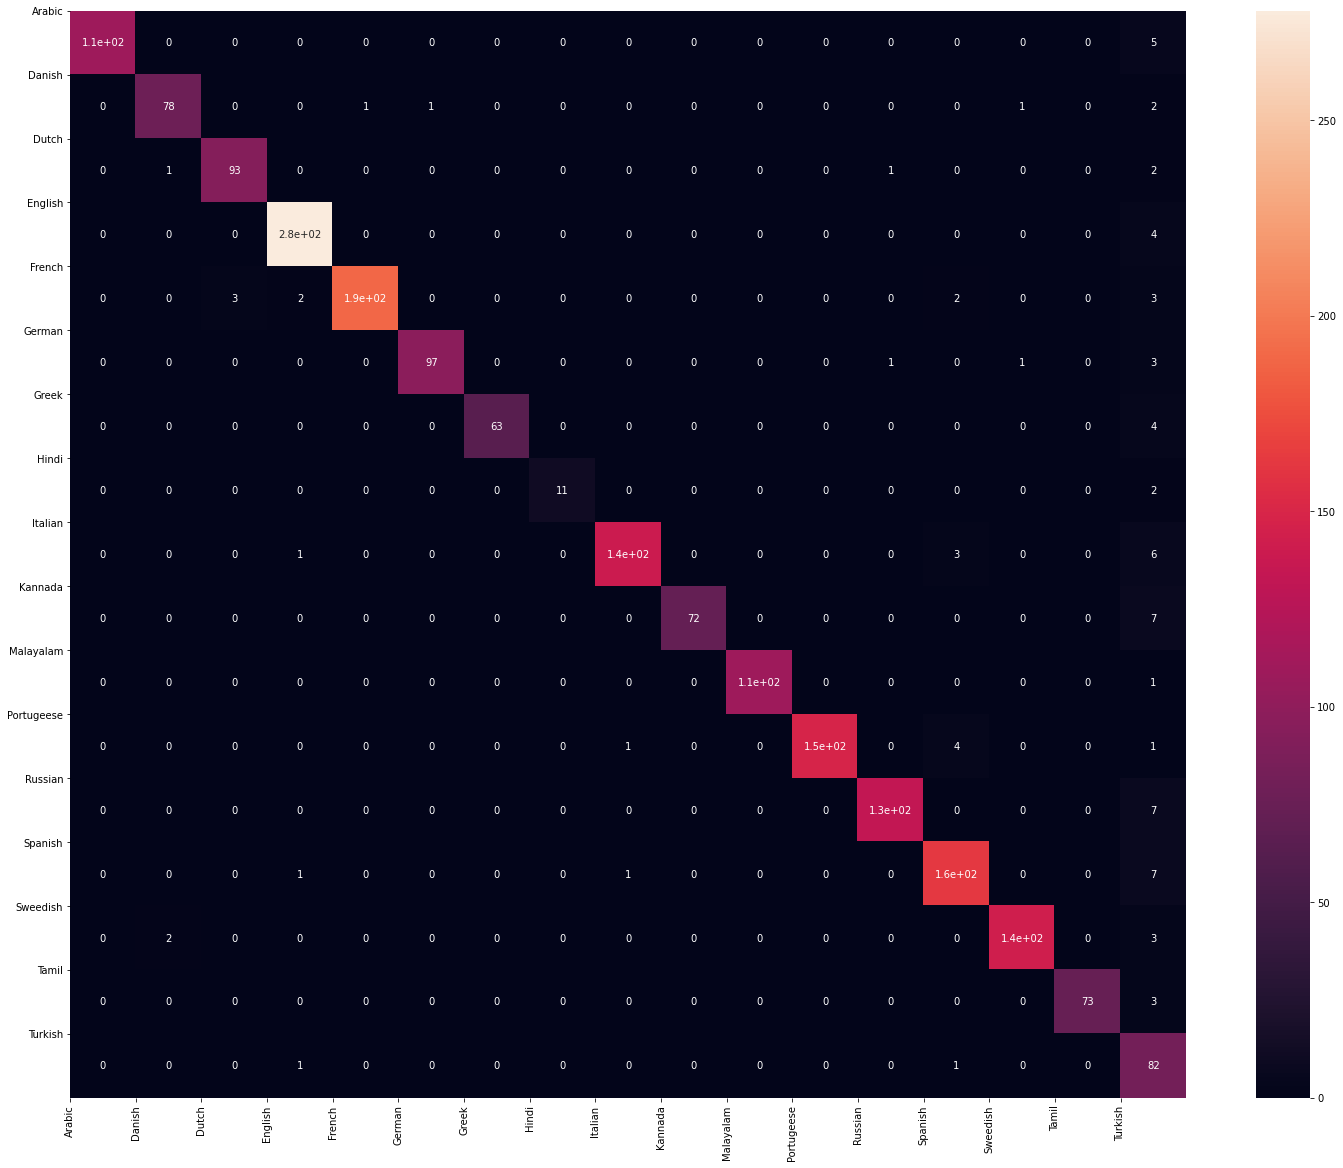

In [41]:
plt.figure(figsize=(25,20))
tick_marks = np.arange(len(newlbs))
sns.heatmap(cm3, annot = True)
plt.xticks(tick_marks, newlbs,rotation=90)
plt.yticks(tick_marks, newlbs,rotation=0)
plt.show()

In [42]:
def predict3(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model3.predict(x) # predicting the language
     lang = lbe.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

In [43]:
predict3("provides a community based knowledge portal for Analytics and Data Science professionals")

The langauge is in English


In [44]:
predict3("توفر  بوابة معرفية قائمة على المجتمع لمحترفي التحليلات وعلوم البيانات")

The langauge is in Arabic


In [45]:
predict("അനലിറ്റിക്സ്, ഡാറ്റാ സയൻസ് പ്രൊഫഷണലുകൾക്കായി കമ്മ്യൂണിറ്റി അധിഷ്ഠിത വിജ്ഞാന പോർട്ടൽ അനലിറ്റിക്സ് വിദ്യ നൽകുന്നു")

The langauge is in Malayalam


In [46]:
predict3("Амит отличный парень")

The langauge is in Turkish


## Following predictions are the corner cases of the above model

In [47]:
predict3("अमित बहुत अच्छा लड़का है")

The langauge is in Turkish


# Using TF-IDF and Naive Bayes algo

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(ngram_range=(1,3), analyzer='char')
t=tf.fit_transform(data_list).toarray()


In [49]:
x2_train, x2_test, y2_train, y2_test = train_test_split(t, z, test_size = 0.20)

In [50]:
model2 = MultinomialNB()
model2.fit(x2_train, y2_train)
y2_pred = model2.predict(x2_test)

In [51]:
ac2 = accuracy_score(y2_test, y2_pred)
print(f"Accuracy is :{ac2*100} %")

Accuracy is :81.33462282398453 %


In [52]:
cm2 = confusion_matrix(y2_test, y2_pred)

In [53]:
setoflbs=set(z)
print(setoflbs)
newlbs=lbe.inverse_transform(list(setoflbs))
print(newlbs)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}
['Arabic' 'Danish' 'Dutch' 'English' 'French' 'German' 'Greek' 'Hindi'
 'Italian' 'Kannada' 'Malayalam' 'Portugeese' 'Russian' 'Spanish'
 'Sweedish' 'Tamil' 'Turkish']


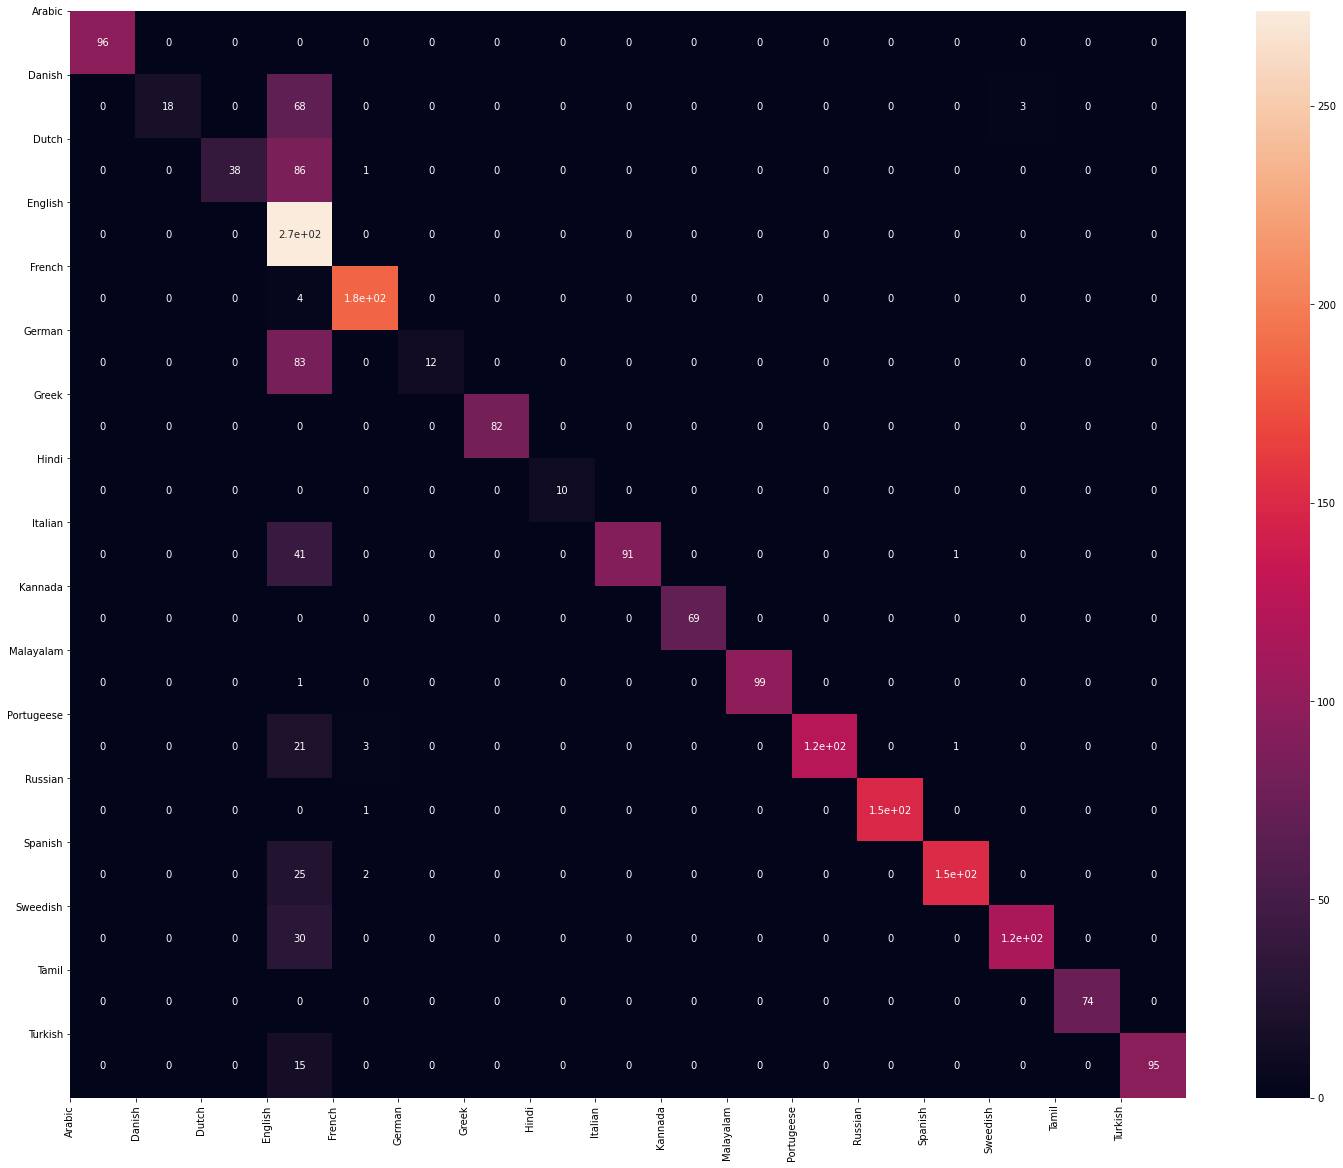

In [54]:
plt.figure(figsize=(25,20))
tick_marks = np.arange(len(newlbs))
sns.heatmap(cm2, annot = True)
plt.xticks(tick_marks, newlbs,rotation=90)
plt.yticks(tick_marks, newlbs,rotation=0)
plt.show()

In [58]:
def predict2(text):
     x = tf.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model2.predict(x) # predicting the language
     lang = lbe.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

## On the basis of confusion matrix following are the corner cases

In [59]:
predict2("oye cual es tu profesion") # actual language is Spanish but identified as English by the model.

The langauge is in English


In [60]:
predict2("Hey was ist dein Beruf")  # actual language is German but identified as English by the model.

The langauge is in English


In [61]:
predict2("hey wat is je beroep?")  # actual language is Dutch but identified as English by the model.

The langauge is in English


In [62]:
predict2("hej hvad er dit erhverv") # actual language is Dutch but identified as English by the model.

The langauge is in English


In [63]:
predict2("hey senin mesleğin ne")  # actual language is Turkish but identified as English by the model.

The langauge is in English


## Following are the correct predictions made by the model

In [64]:
predict2("hey, how are you !")

The langauge is in English


In [65]:
predict2("अरे आपका पेशा क्या है")

The langauge is in Hindi


In [66]:
predict2("ഹേയ് എന്താണ് നിങ്ങളുടെ തൊഴിൽ")

The langauge is in Malayalam


In [67]:
predict2("эй, какая у тебя профессия")

The langauge is in Russian


In [68]:
predict2("مهلا ما هي مهنتك")

The langauge is in Arabic


# Using TF-IDF and Logistic regression

In [69]:
from sklearn.linear_model import LogisticRegression
model4=LogisticRegression()
x3_train, x3_test, y3_train, y3_test = train_test_split(t, z, test_size = 0.20)
model4.fit(x3_train, y3_train)

LogisticRegression()

In [70]:
ytfl_pred = model4.predict(x3_test)

In [71]:
ac4 = accuracy_score(y3_test, ytfl_pred)
cm4 = confusion_matrix(y3_test, ytfl_pred)

In [72]:
print(f"Accuracy is :{ac4*100} %")

Accuracy is :98.45261121856866 %


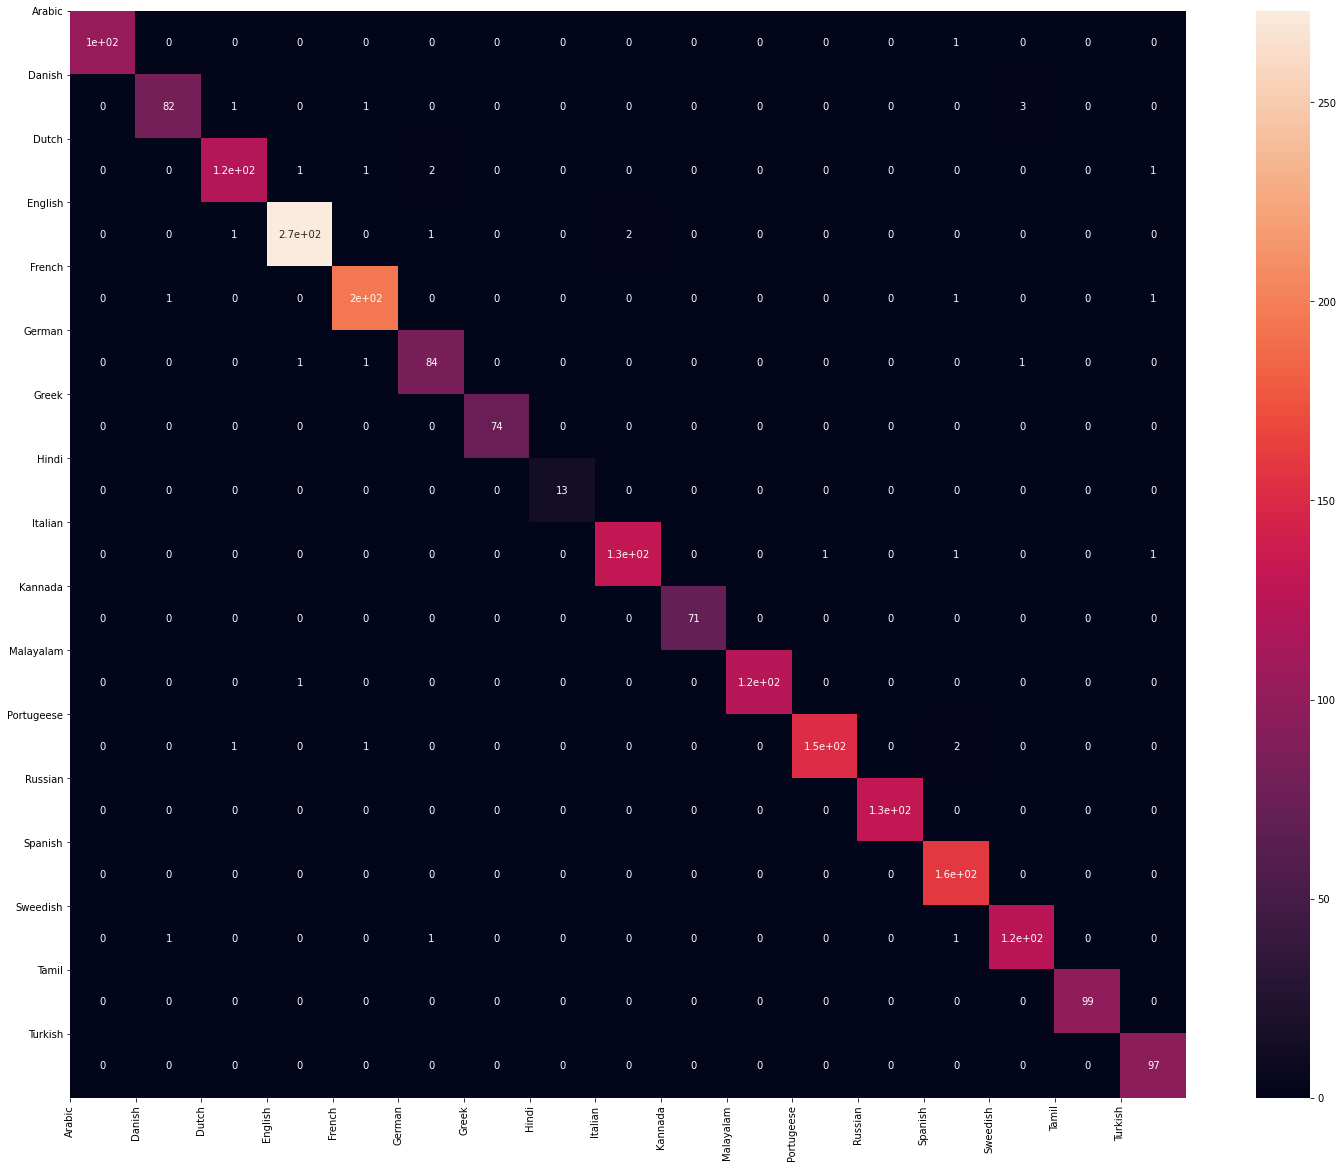

In [73]:
plt.figure(figsize=(25,20))
tick_marks = np.arange(len(newlbs))
sns.heatmap(cm4, annot = True)
plt.xticks(tick_marks, newlbs,rotation=90)
plt.yticks(tick_marks, newlbs,rotation=0)
plt.show()

In [74]:
def predict4(text):
     x = tf.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model4.predict(x) # predicting the language
     lang = lbe.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

In [75]:
predict4("oye cual es tu profesion") 

The langauge is in Spanish


In [76]:
predict4("Hey was ist dein Beruf")

The langauge is in German


In [77]:
predict4("hey wat is je beroep?")

The langauge is in Dutch


In [78]:
predict4("hej hvad er dit erhverv")

The langauge is in Danish


In [80]:
predict4("hey senin mesleğin ne")

The langauge is in Turkish


## All the corner cases of TF-IDF with Naive bayes model has been solved in this model.






# CONCLUSION 

## TF-IDF ---------> TfidfVectorizer
## Bag Of Words ----------> CountVectorizer

| Vectorization | Model | Accuracy |
| :- | -: | :-: |
| TF-IDF | Naive Bayes | 81.33%
| CountVectorizer | LogisticRegression | 95.69%
| CountVectorizer | Naive Bayes | 97.34%
| TF-IDF | LogisticRegression | 98.45%